In [169]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
# Setting random seed to get reproducible runs
RSEED = 100

# Part 1: Data Processing

In [170]:
data = pd.read_csv("cancer_industry.csv")

In [171]:
#data.drop('Unnamed: 0', axis=1, inplace=True)

In [172]:
data.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'ACID', 'ENRG', 'ETOX', 'EUTR',
       'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS',
       'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG',
       'VADD', 'WATR'],
      dtype='object')

In [173]:
factors=np.array(['ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'])

In [174]:
data

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
1,"Autauga County(6,10)",1001,county,3,1,alabama,Oral Cavity & Pharynx,8,13.5,9.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
2,"Autauga County(6,10)",1001,county,17,1,alabama,Esophagus,0,0.0,0.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
3,"Autauga County(6,10)",1001,county,18,1,alabama,Stomach,6,9.1,6.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
4,"Autauga County(6,10)",1001,county,20,1,alabama,Colon & Rectum,32,52.2,44.2,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,county,86,56,wyoming,Non-Hodgkin Lymphoma,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72055,"Weston County(6,10)",56045,county,90,56,wyoming,Leukemia,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72056,"Weston County(6,10)",56045,county,400,56,wyoming,Breast (in situ) (Female),0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72057,"Weston County(6,10)",56045,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450


In [177]:
#def split_keep_first(text):
#    return text.split()[0]
print(data.dtypes)
#data['incidence rate_per_100000'].replace({r'[^\x00-\x7F]':'0'}, regex=True, inplace=True)
#data['incidence rate_per_100000'] = data['incidence rate_per_100000'].str.replace(r'[^0-9]+', '')
#data['incidence rate_per_100000'] = data['incidence rate_per_100000'].astype("str")
#data['incidence rate_per_100000'] = data['incidence rate_per_100000'].apply(split_keep_first)
data['incidence rate_per_100000'] = data['incidence rate_per_100000'].astype("float64")
data

locale                                 object
fips                                    int64
areatype                               object
cancer                                  int64
stateFIPS                               int64
state                                  object
cancer_description                     object
annual_count_avg                        int64
incidence rate_per_100000             float64
incidence rate_lower_95_confidence    float64
incidence rate_upper_95_confidence    float64
ACID                                  float64
ENRG                                  float64
ETOX                                  float64
EUTR                                  float64
FOOD                                  float64
GCC                                   float64
HAPS                                  float64
HAZW                                  float64
HC                                    float64
HNC                                   float64
HRSP                              

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
1,"Autauga County(6,10)",1001,county,3,1,alabama,Oral Cavity & Pharynx,8,13.5,9.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
2,"Autauga County(6,10)",1001,county,17,1,alabama,Esophagus,0,0.0,0.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
3,"Autauga County(6,10)",1001,county,18,1,alabama,Stomach,6,9.1,6.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
4,"Autauga County(6,10)",1001,county,20,1,alabama,Colon & Rectum,32,52.2,44.2,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,county,86,56,wyoming,Non-Hodgkin Lymphoma,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72055,"Weston County(6,10)",56045,county,90,56,wyoming,Leukemia,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72056,"Weston County(6,10)",56045,county,400,56,wyoming,Breast (in situ) (Female),0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72057,"Weston County(6,10)",56045,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450


In [178]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516], dtype=int64)

In [179]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [180]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==3
print("example:")
print(cancerTypes[cancer]["cancer_description"].to_string())

    cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    N

# Part 2: Random Forest Regressor

## Hypertuning

In [185]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['incidence rate_per_100000']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [14]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64]}
rf = RandomForestRegressor(random_state = RSEED)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_

In [15]:
print(clf.best_params_)

{'max_depth': 8, 'n_estimators': 100}


## Random Forest Loop

cancer type: 1
0    All Cancer Sites
Creating RandomForest Model and Fitting the Data
score 0.050324589717410606
Feature Importance
indecis: [ 4 13 18 23 12 16  7 10 22 14  2 17 19 15  6  5  1  3  9 21  8 20  0 11]
importances: [0.07772891 0.07411297 0.06614283 0.06549003 0.06436051 0.06413452
 0.06364976 0.04674476 0.04478523 0.04395101 0.03932078 0.03815571
 0.03691735 0.02961853 0.02760456 0.02713937 0.02712718 0.02701983
 0.02670919 0.02640941 0.02531325 0.02194358 0.01952907 0.01609166]
features: ['FOOD' 'LAND' 'OZON' 'WATR' 'JOBS' 'MSW' 'HAZW' 'HRSP' 'VADD' 'METL'
 'ETOX' 'NREN' 'PEST' 'MINE' 'HAPS' 'GCC' 'ENRG' 'EUTR' 'HNC' 'SMOG' 'HC'
 'REN' 'ACID' 'HTOX']


cancer type: 3
1    Oral Cavity & Pharynx
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.33347058012109776
Feature Importance
indecis: [ 4 12 16 22 13 18  7 20 23 14  3 19  2 10  6  5  0 21 15  8  9 11  1 17]
importances: [0.36746494 0.2138514  0.07495298 0.03334188 0.031448   0.02614026
 0.02353219 0.02074916 0.02001368 0.01926353 0.01924276 0.01787709
 0.01639963 0.01548285 0.01517553 0.01245787 0.01150048 0.01145259
 0.01131744 0.01089857 0.00857318 0.00761053 0.0062514  0.00500206]
features: ['FOOD' 'JOBS' 'MSW' 'VADD' 'LAND' 'OZON' 'HAZW' 'REN' 'WATR' 'METL'
 'EUTR' 'PEST' 'ETOX' 'HRSP' 'HAPS' 'GCC' 'ACID' 'SMOG' 'MINE' 'HC' 'HNC'
 'HTOX' 'ENRG' 'NREN']


cancer type: 17
2    Esophagus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.39073414147042024
Feature Importance
indecis: [ 4 16 12 20  7 22 13 19 14 18 23  3  0  2  6 10  1  5 21 17  9  8 15 11]
importances: [0.36202037 0.19211151 0.12304336 0.04796148 0.02902333 0.02372813
 0.02181928 0.0188563  0.0185565  0.01759874 0.01730692 0.01455678
 0.01374439 0.01173769 0.01138799 0.01112694 0.01010588 0.00939944
 0.00924172 0.00857283 0.0079816  0.00726613 0.00722218 0.00563052]
features: ['FOOD' 'MSW' 'JOBS' 'REN' 'HAZW' 'VADD' 'LAND' 'PEST' 'METL' 'OZON'
 'WATR' 'EUTR' 'ACID' 'ETOX' 'HAPS' 'HRSP' 'ENRG' 'GCC' 'SMOG' 'NREN'
 'HNC' 'HC' 'MINE' 'HTOX']


cancer type: 18
3    Stomach
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.41057853263679017
Feature Importance
indecis: [ 4 12 16 14 13  3 22  7 18 20 23 10 19  2  9  6  0 21  5  1 15 11  8 17]
importances: [0.33127105 0.18058536 0.12733549 0.03932631 0.03313723 0.03006206
 0.02991919 0.02706493 0.02577344 0.02130487 0.01778528 0.01619896
 0.01526871 0.01440163 0.01266115 0.01142904 0.00994607 0.00922169
 0.0091772  0.00900122 0.00805356 0.00786263 0.00718447 0.00602847]
features: ['FOOD' 'JOBS' 'MSW' 'METL' 'LAND' 'EUTR' 'VADD' 'HAZW' 'OZON' 'REN'
 'WATR' 'HRSP' 'PEST' 'ETOX' 'HNC' 'HAPS' 'ACID' 'SMOG' 'GCC' 'ENRG'
 'MINE' 'HTOX' 'HC' 'NREN']


cancer type: 20
4    Colon & Rectum
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.19898674141810424
Feature Importance
indecis: [16 12  4 13 18  7 22 23 14 10  6  9  5  3  2 20 11 19  0 21  8 15 17  1]
importances: [0.18764489 0.16333734 0.09462135 0.05770904 0.05330411 0.05074155
 0.05026122 0.04380084 0.03905722 0.03138321 0.02780492 0.02385079
 0.01967893 0.01954908 0.0194685  0.01664805 0.01638928 0.01474126
 0.01441454 0.01300042 0.01257601 0.01157382 0.01036819 0.00807544]
features: ['MSW' 'JOBS' 'FOOD' 'LAND' 'OZON' 'HAZW' 'VADD' 'WATR' 'METL' 'HRSP'
 'HAPS' 'HNC' 'GCC' 'EUTR' 'ETOX' 'REN' 'HTOX' 'PEST' 'ACID' 'SMOG' 'HC'
 'MINE' 'NREN' 'ENRG']


cancer type: 35
5    Liver & Bile Duct
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.41447620770912796
Feature Importance
indecis: [ 4 16 12 14 22  3  7 20 18 13  2 23 15 10 19  6  5  1 21  0  9 11  8 17]
importances: [0.41003813 0.16561443 0.05533684 0.04084969 0.03153187 0.03145033
 0.02757866 0.02665158 0.02596503 0.02168057 0.02006519 0.01740156
 0.01676299 0.01406628 0.013938   0.01221944 0.01050484 0.01018324
 0.0096541  0.00944112 0.00875874 0.00721402 0.00694163 0.00615172]
features: ['FOOD' 'MSW' 'JOBS' 'METL' 'VADD' 'EUTR' 'HAZW' 'REN' 'OZON' 'LAND'
 'ETOX' 'WATR' 'MINE' 'HRSP' 'PEST' 'HAPS' 'GCC' 'ENRG' 'SMOG' 'ACID'
 'HNC' 'HTOX' 'HC' 'NREN']


cancer type: 40
6    Pancreas
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.456576340889092
Feature Importance
indecis: [ 4 16 12  7 13  2 18 20 14 19  3 10 22 23  0  5 21  9  6  8 11  1 15 17]
importances: [0.34886429 0.22626356 0.06436768 0.05832171 0.03346375 0.02611486
 0.0254272  0.02180764 0.02023563 0.02010367 0.01943563 0.01679128
 0.01667026 0.01493665 0.01165448 0.010251   0.00985556 0.00946421
 0.00913954 0.00863696 0.00818265 0.00732172 0.00697341 0.00571667]
features: ['FOOD' 'MSW' 'JOBS' 'HAZW' 'LAND' 'ETOX' 'OZON' 'REN' 'METL' 'PEST'
 'EUTR' 'HRSP' 'VADD' 'WATR' 'ACID' 'GCC' 'SMOG' 'HNC' 'HAPS' 'HC' 'HTOX'
 'ENRG' 'MINE' 'NREN']


cancer type: 47
7    Lung & Bronchus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.1778297390931124
Feature Importance
indecis: [12 13  4 16 23 18 19 22 14  7 10 17  2  3  5  1 15  0 20  6  9 11  8 21]
importances: [0.14783134 0.12338709 0.11378801 0.06470373 0.06237247 0.0540504
 0.04229042 0.0366214  0.03548829 0.03284617 0.02975467 0.02954767
 0.02707938 0.02690417 0.02393981 0.02333543 0.01985011 0.01904219
 0.01818848 0.01757615 0.01698166 0.01352508 0.0110344  0.00986147]
features: ['JOBS' 'LAND' 'FOOD' 'MSW' 'WATR' 'OZON' 'PEST' 'VADD' 'METL' 'HAZW'
 'HRSP' 'NREN' 'ETOX' 'EUTR' 'GCC' 'ENRG' 'MINE' 'ACID' 'REN' 'HAPS' 'HNC'
 'HTOX' 'HC' 'SMOG']


cancer type: 53
8    Melanoma of the Skin
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.3811024103220013
Feature Importance
indecis: [12 16  4  7 18  6 14 22 23 19 13 20 10  3 17 15  0  8 21  2  5  9  1 11]
importances: [0.22170361 0.20644239 0.15834296 0.03575998 0.03121957 0.02994303
 0.02984783 0.02792077 0.02404836 0.02107478 0.02102135 0.01904636
 0.01823509 0.01722239 0.01615614 0.015554   0.01529499 0.01524423
 0.0146374  0.01455215 0.0133346  0.0123842  0.01140813 0.00960567]
features: ['JOBS' 'MSW' 'FOOD' 'HAZW' 'OZON' 'HAPS' 'METL' 'VADD' 'WATR' 'PEST'
 'LAND' 'REN' 'HRSP' 'EUTR' 'NREN' 'MINE' 'ACID' 'HC' 'SMOG' 'ETOX' 'GCC'
 'HNC' 'ENRG' 'HTOX']


cancer type: 55
9    Breast (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.27814132258683055
Feature Importance
indecis: [12 16 13 18  4 22  2  7 23 19 14 10 15  3  6  5 20 17 11  8  1  9 21  0]
importances: [0.31845853 0.12482538 0.0570809  0.05144557 0.04847369 0.04027265
 0.03656406 0.03651937 0.03343715 0.03081228 0.02907909 0.02509349
 0.01920773 0.01762812 0.0168296  0.0160745  0.01547334 0.01386949
 0.01341262 0.01293563 0.01276156 0.01147492 0.00930337 0.00896694]
features: ['JOBS' 'MSW' 'LAND' 'OZON' 'FOOD' 'VADD' 'ETOX' 'HAZW' 'WATR' 'PEST'
 'METL' 'HRSP' 'MINE' 'EUTR' 'HAPS' 'GCC' 'REN' 'NREN' 'HTOX' 'HC' 'ENRG'
 'HNC' 'SMOG' 'ACID']


cancer type: 57
10    Cervix (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.47311313386055287
Feature Importance
indecis: [16 22  4 18 12  7  3 20 21 13 14 19  2  9 10  8  6  0 23  1 11 15  5 17]
importances: [0.39288339 0.12854468 0.10331359 0.04723868 0.04059325 0.02400511
 0.02327018 0.02262455 0.02236472 0.01850904 0.01835816 0.01818419
 0.01742155 0.01663862 0.0151434  0.01501815 0.01367119 0.01062194
 0.00960514 0.00918509 0.00910085 0.00875291 0.00845095 0.00650069]
features: ['MSW' 'VADD' 'FOOD' 'OZON' 'JOBS' 'HAZW' 'EUTR' 'REN' 'SMOG' 'LAND'
 'METL' 'PEST' 'ETOX' 'HNC' 'HRSP' 'HC' 'HAPS' 'ACID' 'WATR' 'ENRG' 'HTOX'
 'MINE' 'GCC' 'NREN']


cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.4680403877246888
Feature Importance
indecis: [ 4 16 12 18 10  7 20 14 23 13  6  3  9  2 22  5 19  8  0 11 15 21  1 17]
importances: [0.44944111 0.13262308 0.09892036 0.02621139 0.02375391 0.02278741
 0.02011247 0.01981011 0.01935314 0.01799394 0.01761601 0.01700441
 0.01516776 0.01453059 0.01400925 0.01333725 0.01297556 0.01217663
 0.01107459 0.0106856  0.00942446 0.00803885 0.00686391 0.00608821]
features: ['FOOD' 'MSW' 'JOBS' 'OZON' 'HRSP' 'HAZW' 'REN' 'METL' 'WATR' 'LAND'
 'HAPS' 'EUTR' 'HNC' 'ETOX' 'VADD' 'GCC' 'PEST' 'HC' 'ACID' 'HTOX' 'MINE'
 'SMOG' 'ENRG' 'NREN']


cancer type: 61
12    Ovary (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.5728228328248277
Feature Importance
indecis: [12 16  4 22 14 18 23  7 20 10  3 19  2 13  5  6  1 21  0 15  9  8 11 17]
importances: [0.28284239 0.26382556 0.15481811 0.03121092 0.02334959 0.02234815
 0.02100002 0.02008349 0.01745528 0.01722901 0.0157127  0.0147488
 0.01458849 0.01410462 0.01300021 0.01167808 0.00942449 0.00927189
 0.00909191 0.00850504 0.00769032 0.00761708 0.00619861 0.00420523]
features: ['JOBS' 'MSW' 'FOOD' 'VADD' 'METL' 'OZON' 'WATR' 'HAZW' 'REN' 'HRSP'
 'EUTR' 'PEST' 'ETOX' 'LAND' 'GCC' 'HAPS' 'ENRG' 'SMOG' 'ACID' 'MINE'
 'HNC' 'HC' 'HTOX' 'NREN']


cancer type: 66
13    Prostate (Male)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.19651871680125246
Feature Importance
indecis: [12 16 13  2 18  4 23 22 19  7 14 10  3 15  6  5 11  9 17  8  1 20  0 21]
importances: [0.16853032 0.11420396 0.09034378 0.07126612 0.0607904  0.05929397
 0.05253133 0.0491171  0.04581578 0.04054863 0.03374038 0.02323638
 0.02290859 0.01976699 0.01947629 0.01846613 0.01672102 0.01569499
 0.01457378 0.01414752 0.01383291 0.01318166 0.01200675 0.00980522]
features: ['JOBS' 'MSW' 'LAND' 'ETOX' 'OZON' 'FOOD' 'WATR' 'VADD' 'PEST' 'HAZW'
 'METL' 'HRSP' 'EUTR' 'MINE' 'HAPS' 'GCC' 'HTOX' 'HNC' 'NREN' 'HC' 'ENRG'
 'REN' 'ACID' 'SMOG']


cancer type: 71
14    Bladder
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.39923570881348314
Feature Importance
indecis: [12 16  4  7 18 13 22 23  6 14 20 10 19  5  3  2  9 17 21  8 15  0 11  1]
importances: [0.25958518 0.25327569 0.13734788 0.0305903  0.02767514 0.02432184
 0.02286168 0.02176042 0.01876093 0.01802268 0.01756309 0.01706148
 0.0162044  0.01613667 0.01544664 0.01425566 0.01421086 0.0126905
 0.01155132 0.01144847 0.01057822 0.01045594 0.00986231 0.00833269]
features: ['JOBS' 'MSW' 'FOOD' 'HAZW' 'OZON' 'LAND' 'VADD' 'WATR' 'HAPS' 'METL'
 'REN' 'HRSP' 'PEST' 'GCC' 'EUTR' 'ETOX' 'HNC' 'NREN' 'SMOG' 'HC' 'MINE'
 'ACID' 'HTOX' 'ENRG']


cancer type: 72
15    Kidney & Renal Pelvis
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.34978301498836395
Feature Importance
indecis: [16 12  4 22  7 13 18 14 23 20  2 19 10  3  5  9  0  6  8 11 21 15  1 17]
importances: [0.27834516 0.16416546 0.09368223 0.06972946 0.04102287 0.03488329
 0.03137718 0.02765926 0.02634895 0.02576355 0.02342807 0.02319605
 0.02268736 0.01961861 0.01770456 0.01573392 0.01450121 0.01427802
 0.01331511 0.01161612 0.00998538 0.00928062 0.00743694 0.00424062]
features: ['MSW' 'JOBS' 'FOOD' 'VADD' 'HAZW' 'LAND' 'OZON' 'METL' 'WATR' 'REN'
 'ETOX' 'PEST' 'HRSP' 'EUTR' 'GCC' 'HNC' 'ACID' 'HAPS' 'HC' 'HTOX' 'SMOG'
 'MINE' 'ENRG' 'NREN']


cancer type: 76
16    Brain & ONS
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.5288410099714033
Feature Importance
indecis: [ 4 16 14 18 20 12  7  2 13  3 22 19 10 23  6  5  1  0 21 15  9 17  8 11]
importances: [0.50720076 0.20047024 0.03910583 0.0317977  0.02332914 0.01875797
 0.01587065 0.01443898 0.01322878 0.0126091  0.01245207 0.01192212
 0.01138398 0.01009717 0.00994931 0.0097955  0.00947966 0.00896341
 0.00809616 0.00676725 0.00672333 0.00635722 0.00586444 0.00533922]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'REN' 'JOBS' 'HAZW' 'ETOX' 'LAND' 'EUTR'
 'VADD' 'PEST' 'HRSP' 'WATR' 'HAPS' 'GCC' 'ENRG' 'ACID' 'SMOG' 'MINE'
 'HNC' 'NREN' 'HC' 'HTOX']


cancer type: 80
17    Thyroid
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.44493672381370974
Feature Importance
indecis: [ 4 12 16  7 23 14 18 10 22 20 13  6 15 19  2  3  9  8  5 21  1  0 11 17]
importances: [0.41809841 0.1795623  0.07566732 0.03164656 0.02557762 0.0231334
 0.02294973 0.02087489 0.01929949 0.01673019 0.01656628 0.01639276
 0.01573123 0.01435941 0.0132185  0.01193148 0.01082272 0.01075299
 0.01071271 0.01069498 0.00978174 0.00919456 0.00873189 0.00756885]
features: ['FOOD' 'JOBS' 'MSW' 'HAZW' 'WATR' 'METL' 'OZON' 'HRSP' 'VADD' 'REN'
 'LAND' 'HAPS' 'MINE' 'PEST' 'ETOX' 'EUTR' 'HNC' 'HC' 'GCC' 'SMOG' 'ENRG'
 'ACID' 'HTOX' 'NREN']


cancer type: 86
18    Non-Hodgkin Lymphoma
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.4553466388324569
Feature Importance
indecis: [12 16  4 18  7 22 20 23  6 14 13 10 19  9  3  2  5  0 17 11 21  1  8 15]
importances: [0.30456955 0.26180229 0.09467954 0.02943161 0.02880048 0.02852727
 0.02475283 0.02350099 0.02122576 0.01842613 0.01703343 0.01702176
 0.013448   0.01319318 0.01258178 0.012235   0.01179175 0.01083619
 0.01029357 0.00994904 0.0097971  0.00930533 0.00859032 0.0082071 ]
features: ['JOBS' 'MSW' 'FOOD' 'OZON' 'HAZW' 'VADD' 'REN' 'WATR' 'HAPS' 'METL'
 'LAND' 'HRSP' 'PEST' 'HNC' 'EUTR' 'ETOX' 'GCC' 'ACID' 'NREN' 'HTOX'
 'SMOG' 'ENRG' 'HC' 'MINE']


cancer type: 90
19    Leukemia
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.4100543449980434
Feature Importance
indecis: [ 4 12 16  7 22 14 18 23 13  2 20 19 10  3  6  9 11  8  0 21  5  1 17 15]
importances: [0.35100965 0.31115164 0.04495383 0.02548771 0.02355582 0.02173052
 0.02099077 0.01940273 0.01895067 0.01708275 0.01605414 0.01578185
 0.01549959 0.01494054 0.01177799 0.0112718  0.00935611 0.00923782
 0.00886634 0.00871778 0.00829575 0.00659345 0.00516947 0.00412126]
features: ['FOOD' 'JOBS' 'MSW' 'HAZW' 'VADD' 'METL' 'OZON' 'WATR' 'LAND' 'ETOX'
 'REN' 'PEST' 'HRSP' 'EUTR' 'HAPS' 'HNC' 'HTOX' 'HC' 'ACID' 'SMOG' 'GCC'
 'ENRG' 'NREN' 'MINE']


cancer type: 400
20    Breast (in situ) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.514650136019932
Feature Importance
indecis: [ 4 16 12 13 20 18 22  7 19 14  6  2 15 23  3 10 17 21  8  1  0  5  9 11]
importances: [0.46442209 0.1650248  0.06386877 0.02375998 0.0234438  0.02280336
 0.02189246 0.02081545 0.0190151  0.0159611  0.01445485 0.01443408
 0.01393424 0.01390582 0.01385919 0.01296419 0.01116593 0.01085611
 0.01060606 0.0103158  0.00938963 0.0090945  0.00761461 0.00639808]
features: ['FOOD' 'MSW' 'JOBS' 'LAND' 'REN' 'OZON' 'VADD' 'HAZW' 'PEST' 'METL'
 'HAPS' 'ETOX' 'MINE' 'WATR' 'EUTR' 'HRSP' 'NREN' 'SMOG' 'HC' 'ENRG'
 'ACID' 'GCC' 'HNC' 'HTOX']


cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.6069151319606234
Feature Importance
indecis: [16 22  4  7 10 12 18  9 14  3  5 20 13 19  8 23 21  2  6 11  1  0 15 17]
importances: [0.56166039 0.09250116 0.04032712 0.02820164 0.02544922 0.02542184
 0.01983815 0.0194579  0.0190283  0.0186094  0.01808495 0.01591063
 0.0146838  0.01447373 0.01302216 0.01160221 0.01000767 0.00918969
 0.00838056 0.00784902 0.00740756 0.00716713 0.00713844 0.00458732]
features: ['MSW' 'VADD' 'FOOD' 'HAZW' 'HRSP' 'JOBS' 'OZON' 'HNC' 'METL' 'EUTR' 'GCC'
 'REN' 'LAND' 'PEST' 'HC' 'WATR' 'SMOG' 'ETOX' 'HAPS' 'HTOX' 'ENRG' 'ACID'
 'MINE' 'NREN']


cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.6214500838610189
Feature Importance
indecis: [ 4 16 22 12 18  7  3 13 14  9 20 23 19  2 11 15 10 21  6  8  1 17  5  0]
importances: [0.36033892 0.22512471 0.07799656 0.06190708 0.03493033 0.02524895
 0.02270789 0.01721901 0.0170329  0.01472953 0.01404266 0.01370219
 0.01315809 0.01124653 0.01094157 0.01069751 0.01062065 0.00966424
 0.00907927 0.00875306 0.00832711 0.00808612 0.00797579 0.00646933]
features: ['FOOD' 'MSW' 'VADD' 'JOBS' 'OZON' 'HAZW' 'EUTR' 'LAND' 'METL' 'HNC' 'REN'
 'WATR' 'PEST' 'ETOX' 'HTOX' 'MINE' 'HRSP' 'SMOG' 'HAPS' 'HC' 'ENRG'
 'NREN' 'GCC' 'ACID']


Average score: 0.39712732480149315


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


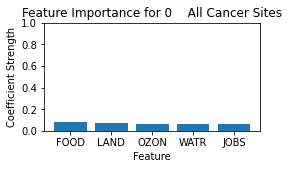

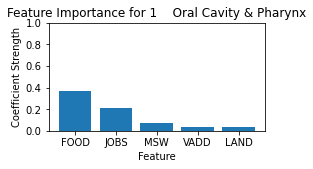

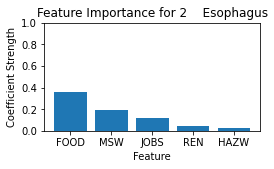

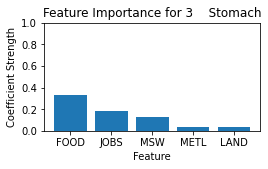

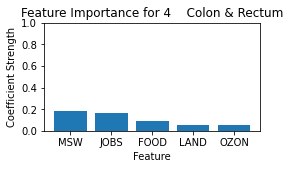

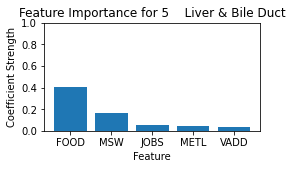

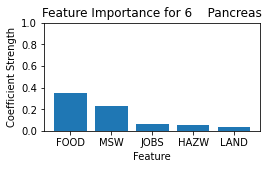

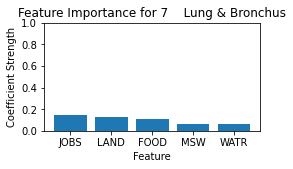

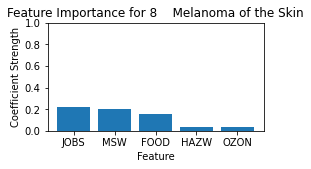

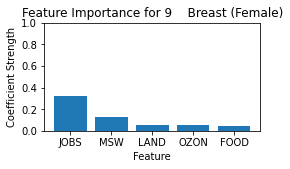

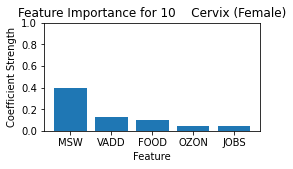

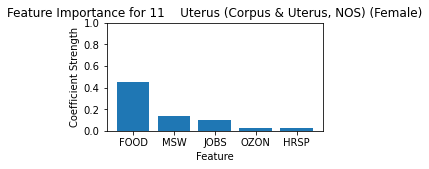

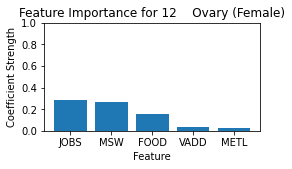

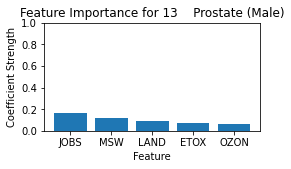

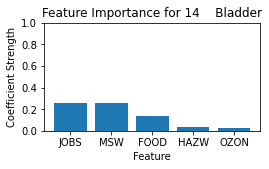

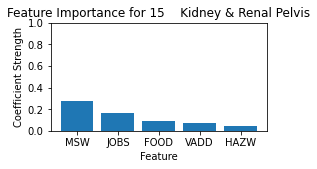

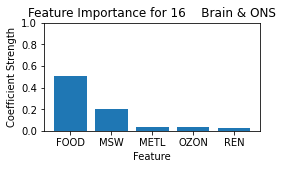

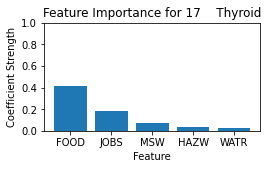

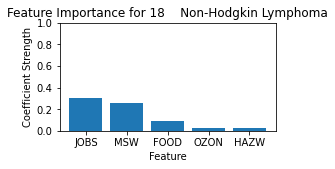

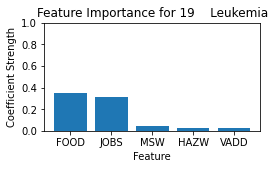

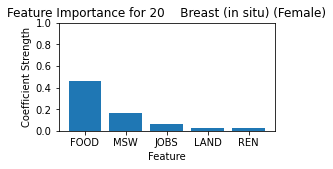

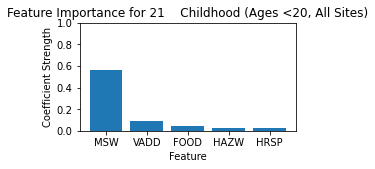

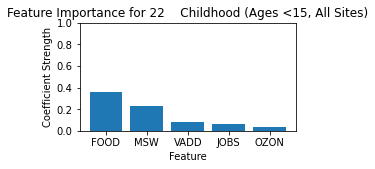

In [186]:
sum1 = 0

for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['incidence rate_per_100000']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 100,
                                      max_depth= 8, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    r2_score=rf.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score

    #Feature Importance
    print("Feature Importance")
    features=rf.feature_importances_
    #print(features)
    ind = np.argsort(features)[::-1]
    print("indecis:",ind)
    imp = features[ind]
    print("importances:",imp)
    cols =factors[ind]
    print("features:",cols)
    
    #plot the importance factors
    fig=plt.figure(figsize=(3,1.5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Feature Importance for {}'.format(discr))
    ax.bar( cols[:5].tolist(),imp[:5].tolist())
    ax.set_ylabel("Coefficient Strength")
    ax.set_xlabel("Feature")
    plt.ylim(0, 1)
    fig.show()
    print("\n")

print(f"Average score: {sum1/len(cancerVals)}")

# Logistic Regression

## Hypertuning

In [187]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['incidence rate_per_100000']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [183]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [64,100,128,200,256,400,528,1000]}
lr = LogisticRegression(random_state = RSEED)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tr

ValueError: Unknown label type: 'continuous'

In [19]:
print(clf.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Logistic Regression Loop

In [188]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['incidence rate_per_100000']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating Logistic Regression Model
    print("Creating Logistic Regression Model and Fitting the Data")
    lr = LogisticRegression(random_state=RSEED,solver='sag' ,max_iter=2000)

    # Fit on training data
    lr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=lr.score(X_test, y_test)
    print("score",r2_score)
    print("\n")
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Logistic Regression Model and Fitting the Data


ValueError: Unknown label type: 'continuous'

# SVR

## Hypertuning

In [189]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [23]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)


parameters={'C': [0.01,0.1,1],'epsilon':[0,0.001,0.01,0.1,1],'tol':[1e-5,1e-3,1e-1],'max_iter': [64,100,128,200,256,400,528,1000,2000]}
svr =LinearSVR(random_state = RSEED)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=100, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1],
                         'epsilon': [0, 0.001, 0.01, 0.1, 1],
                         'max_iter': [64, 100, 128, 200, 256, 400, 528, 1000,
                                      2000],
                         'tol': [1e-05, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
print(clf.best_params_)

{'C': 1, 'epsilon': 0.1, 'max_iter': 64, 'tol': 0.001}


## SVR Loop

In [190]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating SVR Model and Fitting the Data")
    svr = LinearSVR(random_state=0, C= 1, epsilon= 0, max_iter=64, tol= 0.1)

    # Fit on training data
    svr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=svr.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating SVR Model and Fitting the Data
score 0.6746386646183304
cancer type: 3
1    Oral Cavity & Pharynx
Creating SVR Model and Fitting the Data
score 0.8701412521401279
cancer type: 17
2    Esophagus
Creating SVR Model and Fitting the Data
score 0.866918618547867
cancer type: 18
3    Stomach
Creating SVR Model and Fitting the Data
score 0.8779323444238613
cancer type: 20
4    Colon & Rectum
Creating SVR Model and Fitting the Data
score 0.8725395886410223
cancer type: 35
5    Liver & Bile Duct
Creating SVR Model and Fitting the Data
score 0.8684901994718255
cancer type: 40
6    Pancreas
Creating SVR Model and Fitting the Data
score 0.8901680383711259
cancer type: 47
7    Lung & Bronchus
Creating SVR Model and Fitting the Data
score 0.8012247351127004
cancer type: 53
8    Melanoma of the Skin
Creating SVR Model and Fitting the Data
score 0.7650814626417408
cancer type: 55
9    Breast (Female)
Creating SVR Model and Fitting the Data
score 0.90849415

## Other Models

In [191]:
from sklearn import linear_model

cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1 = newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [192]:
ridge = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)

In [193]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Ridge Model and Fitting the Data")
    ridge = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)
    
    #Evaluation
    r2_score = ridge.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Ridge Model and Fitting the Data
score 0.9025716440951275
cancer type: 3
1    Oral Cavity & Pharynx
Creating Ridge Model and Fitting the Data
score 0.8737647883033777
cancer type: 17
2    Esophagus
Creating Ridge Model and Fitting the Data
score 0.8773831331720305
cancer type: 18
3    Stomach
Creating Ridge Model and Fitting the Data
score 0.7698276613277772
cancer type: 20
4    Colon & Rectum
Creating Ridge Model and Fitting the Data
score 0.8918640094051146
cancer type: 35
5    Liver & Bile Duct
Creating Ridge Model and Fitting the Data
score 0.8215960099034895
cancer type: 40
6    Pancreas
Creating Ridge Model and Fitting the Data
score 0.8974095256595276
cancer type: 47
7    Lung & Bronchus
Creating Ridge Model and Fitting the Data
score 0.8741241949022194
cancer type: 53
8    Melanoma of the Skin
Creating Ridge Model and Fitting the Data
score 0.7722141774247713
cancer type: 55
9    Breast (Female)
Creating Ridge Model and Fitting the 

In [194]:
from sklearn.linear_model import ElasticNet
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Elastic Net Model and Fitting the Data")
    eNet = ElasticNet(random_state=RSEED).fit(X_train, y_train)
    
    #Evaluation
    r2_score = eNet.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Elastic Net Model and Fitting the Data
score 0.7844564263129821
cancer type: 3
1    Oral Cavity & Pharynx
Creating Elastic Net Model and Fitting the Data
score 0.7624204450347621
cancer type: 17
2    Esophagus
Creating Elastic Net Model and Fitting the Data
score 0.6815159761122989
cancer type: 18
3    Stomach
Creating Elastic Net Model and Fitting the Data
score 0.8147222997214707
cancer type: 20
4    Colon & Rectum
Creating Elastic Net Model and Fitting the Data
score 0.7744416914950359
cancer type: 35
5    Liver & Bile Duct
Creating Elastic Net Model and Fitting the Data
score 0.7872361466839912
cancer type: 40
6    Pancreas
Creating Elastic Net Model and Fitting the Data
score 0.7675833787539406
cancer type: 47
7    Lung & Bronchus
Creating Elastic Net Model and Fitting the Data
score 0.7067622973093071
cancer type: 53
8    Melanoma of the Skin
Creating Elastic Net Model and Fitting the Data
score 0.6881270014680525
cancer type: 55
9   

In [195]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Lasso Model and Fitting the Data")
    lasso = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)
    
    #Evaluation
    r2_score = lasso.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Lasso Model and Fitting the Data
score 0.8969623669548089
cancer type: 3
1    Oral Cavity & Pharynx
Creating Lasso Model and Fitting the Data
score 0.8683599829265045
cancer type: 17
2    Esophagus
Creating Lasso Model and Fitting the Data
score 0.8686486168615004
cancer type: 18
3    Stomach
Creating Lasso Model and Fitting the Data
score 0.7630405045273791
cancer type: 20
4    Colon & Rectum
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129173876.32710503, tolerance: 540730.6803087096
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104089.87067688466, tolerance: 352.4772922936618
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20399.624631353374, tolerance: 45.46706374828999
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

score 0.8884298993796352
cancer type: 35
5    Liver & Bile Duct
Creating Lasso Model and Fitting the Data
score 0.8103952526326066
cancer type: 40
6    Pancreas
Creating Lasso Model and Fitting the Data
score 0.8907012234529176
cancer type: 47
7    Lung & Bronchus
Creating Lasso Model and Fitting the Data
score 0.8661234589691071
cancer type: 53
8    Melanoma of the Skin
Creating Lasso Model and Fitting the Data
score 0.7738672640162452
cancer type: 55
9    Breast (Female)
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2472227.7499809265, tolerance: 13217.972758230735
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13667.31019476535, tolerance: 49.966404468764324
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153119.02669025786, tolerance: 704.0653502963977
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

score 0.9119726739449163
cancer type: 57
10    Cervix (Female)
Creating Lasso Model and Fitting the Data
score 0.8444291307872867
cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating Lasso Model and Fitting the Data
score 0.8611870193637076
cancer type: 61
12    Ovary (Female)
Creating Lasso Model and Fitting the Data
score 0.8924470681234309
cancer type: 66
13    Prostate (Male)
Creating Lasso Model and Fitting the Data
score 0.8604717605166988
cancer type: 71
14    Bladder
Creating Lasso Model and Fitting the Data
score 0.8763144323988025
cancer type: 72
15    Kidney & Renal Pelvis
Creating Lasso Model and Fitting the Data
score 0.8941784397794621
cancer type: 76
16    Brain & ONS
Creating Lasso Model and Fitting the Data
score 0.9108811920661329
cancer type: 80
17    Thyroid
Creating Lasso Model and Fitting the Data
score 0.8766125180945074
cancer type: 86
18    Non-Hodgkin Lymphoma
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383065.7452778023, tolerance: 941.5332523483819
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170046.9625533043, tolerance: 696.894666484269
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23410.58117036393, tolerance: 102.68313059735523
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

score 0.8470254455956951
cancer type: 90
19    Leukemia
Creating Lasso Model and Fitting the Data
score 0.8490187844670306
cancer type: 400
20    Breast (in situ) (Female)
Creating Lasso Model and Fitting the Data
score 0.858275855850356
cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating Lasso Model and Fitting the Data
score 0.8898610310910218
cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating Lasso Model and Fitting the Data
score 0.8906117890087304
Average score: 0.864774596122108


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169231.46859119923, tolerance: 510.6279533059732
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248784.10536564284, tolerance: 865.0445087095295
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15912.26895371276, tolerance: 69.79494126766983
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

In [196]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Lasso Model and Fitting the Data")
    lasso = linear_model.LassoLars(alpha=0.01).fit(X_train, y_train)
    
    #Evaluation
    r2_score = lasso.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Lasso Model and Fitting the Data
score 0.901807204254413
cancer type: 3
1    Oral Cavity & Pharynx
Creating Lasso Model and Fitting the Data
score 0.8911905465481343
cancer type: 17
2    Esophagus
Creating Lasso Model and Fitting the Data
score 0.7198206898946616
cancer type: 18
3    Stomach
Creating Lasso Model and Fitting the Data
score 0.8748911764137646
cancer type: 20
4    Colon & Rectum
Creating Lasso Model and Fitting the Data
score 0.9100972503406626
cancer type: 35
5    Liver & Bile Duct
Creating Lasso Model and Fitting the Data
score 0.8708546869209388
cancer type: 40
6    Pancreas
Creating Lasso Model and Fitting the Data
score 0.8999386954324663
cancer type: 47
7    Lung & Bronchus
Creating Lasso Model and Fitting the Data
score 0.8744464744824003
cancer type: 53
8    Melanoma of the Skin
Creating Lasso Model and Fitting the Data
score 0.8042425692522832
cancer type: 55
9    Breast (Female)
Creating Lasso Model and Fitting the D

In [197]:
lasso.coef_

array([ 0.        ,  0.        ,  2.41646587,  0.99500504,  2.80908242,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.1308057 ,
        0.        ,  0.        , -0.30420355,  2.11201954,  0.3436754 ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [198]:
lasso.intercept_

2.7861377108983127

In [199]:
import numpy as np
np.savetxt("weights2.csv", lasso.coef_, delimiter=",")

In [200]:
lasso.predict(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]).reshape(1, -1))

array([116.54926839])